In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv('laptops.csv')
df.head()

,laptop_name,brand_name,hard_disc_size,disc-tech,RAM,screen_size,CPU,price_in_₸
0,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,38900.0
1,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,46900.0
2,Toshiba Dynabook R731,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,67500.0
3,Toshiba Dynabook R731/B,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,78900.0
4,Lenovo ThinkPad X260 256 SSD,Lenovo,256,SSD,16,12.5,Core i5-6300U 2.4 ГГц,79900.0


# Data Cleaning of second dataset

In [198]:
df2 = pd.read_json('notebooks.json')
df2.head()

,name,brand,gigabytes,disc-tech,RAM,screen_size,CPU,price
0,Toshiba Dynabook R731,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,59 900 ₸
1,Toshiba Dynabook R731/B,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,69 900 ₸
2,Qmax VisionBook,Qmax,256,SSD,4,15.6,Celeron N4000 1.1 ГГц,125 900 ₸
3,Lenovo ThinkPad X270,Lenovo,256,SSD,8,12.0,Core i5-6200U 2.3 ГГц,125 900 ₸
4,Lenovo ThinkPad X260,Lenovo,500,HDD,8,12.5,Core i5-6200U 2.3 ГГц,129 900 ₸


Change column name

In [199]:
df2.rename(columns = {'name':'laptop_name','gigabytes':'hard_disc_size','brand':'brand_name','price':'price_in_₸'}, inplace = True) 

In [200]:
df2.dtypes

laptop_name        object
brand_name         object
hard_disc_size      int64
disc-tech          object
RAM                 int64
screen_size       float64
CPU                object
price_in_₸         object
dtype: object

Necessary to change price column from object type into int type

In [201]:
df2['price_in_₸'] = df2['price_in_₸'].str.replace('₸','') #removing cuurency sign

In [202]:
df2['price_in_₸'] = df2['price_in_₸'].str.replace(' ','') #removing extra space

In [203]:
df2['price_in_₸'] = df2['price_in_₸'].apply(pd.to_numeric)

Removing rows with empty values

In [204]:
df2.isnull().sum()

laptop_name       0
brand_name        0
hard_disc_size    0
disc-tech         0
RAM               0
screen_size       0
CPU               0
price_in_₸        4
dtype: int64

In [205]:
df2_updated = df2.dropna(axis=0)

In [206]:
df2_updated.shape

(1322, 8)

Removing unnecessary word "Ноутбук" from 'laptop_name'

In [207]:
df2_updated['laptop_name'] = df2_updated['laptop_name'].str.replace('Ноутбук','')

C:\Users\askha\AppData\Local\Temp\ipykernel_13284\2707053988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated['laptop_name'] = df2_updated['laptop_name'].str.replace('Ноутбук','')


In [208]:
df2_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1325
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   laptop_name     1322 non-null   object 
 1   brand_name      1322 non-null   object 
 2   hard_disc_size  1322 non-null   int64  
 3   disc-tech       1322 non-null   object 
 4   RAM             1322 non-null   int64  
 5   screen_size     1322 non-null   float64
 6   CPU             1322 non-null   object 
 7   price_in_₸      1322 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.0+ KB


Combining two datasets(one from csv and second is .json file)

In [209]:
df_final = df.append(df2_updated)
df_final.head()

C:\Users\askha\AppData\Local\Temp\ipykernel_13284\1818399767.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df.append(df2_updated)


,laptop_name,brand_name,hard_disc_size,disc-tech,RAM,screen_size,CPU,price_in_₸
0,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,38900.0
1,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,46900.0
2,Toshiba Dynabook R731,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,67500.0
3,Toshiba Dynabook R731/B,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,78900.0
4,Lenovo ThinkPad X260 256 SSD,Lenovo,256,SSD,16,12.5,Core i5-6300U 2.4 ГГц,79900.0


In [210]:
#Удаляем столбец CPU потому что много категорий данных 
df_final.drop(['CPU'],axis=1,inplace=True)

In [211]:
df_final.shape

(2845, 7)

In [212]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 0 to 1325
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   laptop_name     2845 non-null   object 
 1   brand_name      2845 non-null   object 
 2   hard_disc_size  2845 non-null   int64  
 3   disc-tech       2845 non-null   object 
 4   RAM             2845 non-null   int64  
 5   screen_size     2845 non-null   float64
 6   price_in_₸      2845 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 177.8+ KB


Turning tenge to dollar (1 dollar = 451.14 tenge)

In [213]:
df_final['price_in_₸'] = df_final['price_in_₸'] / 451.14

Exploaratory Data Analysis

In [214]:
sns.set(rc={"figure.figsize":(15,5)}) 

<AxesSubplot: xlabel='brand_name', ylabel='count'>

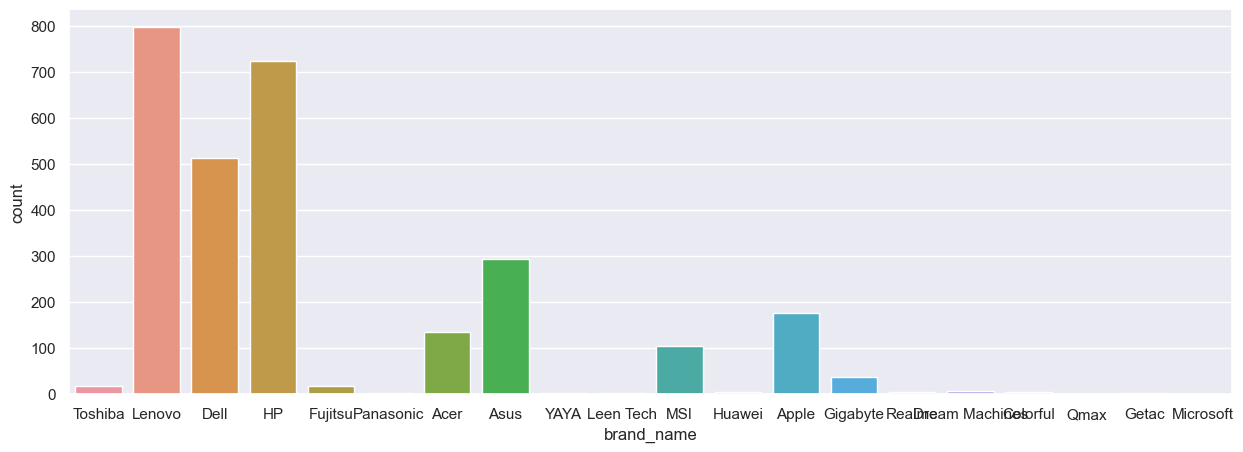

In [215]:
sns.countplot(x=df_final['brand_name'],data=df_final)
# lenovo,HP and Dell are the most popular among people

<AxesSubplot: xlabel='disc-tech', ylabel='count'>

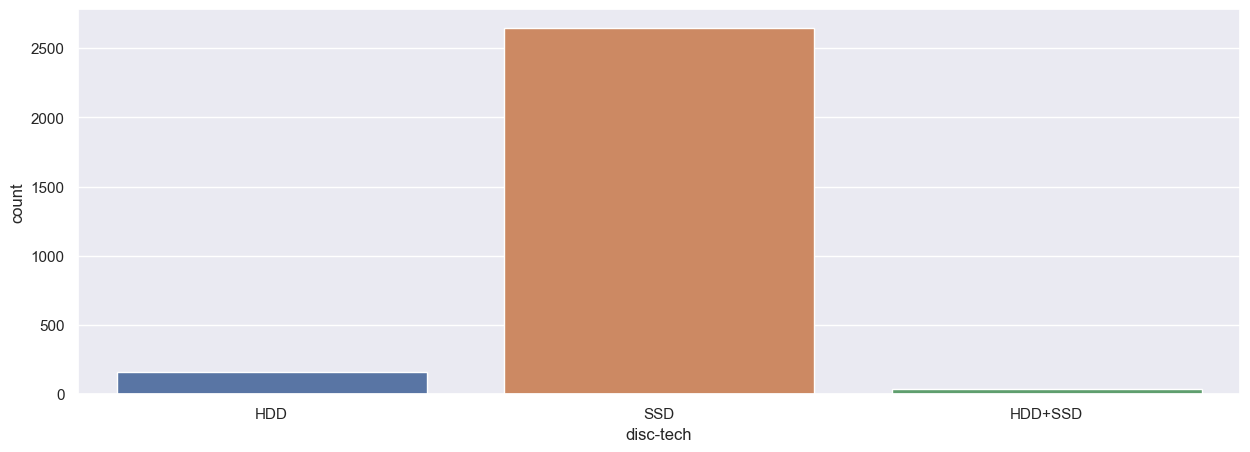

In [216]:
sns.countplot(x=df_final['disc-tech'],data=df_final)

<AxesSubplot: xlabel='brand_name', ylabel='price_in_₸'>

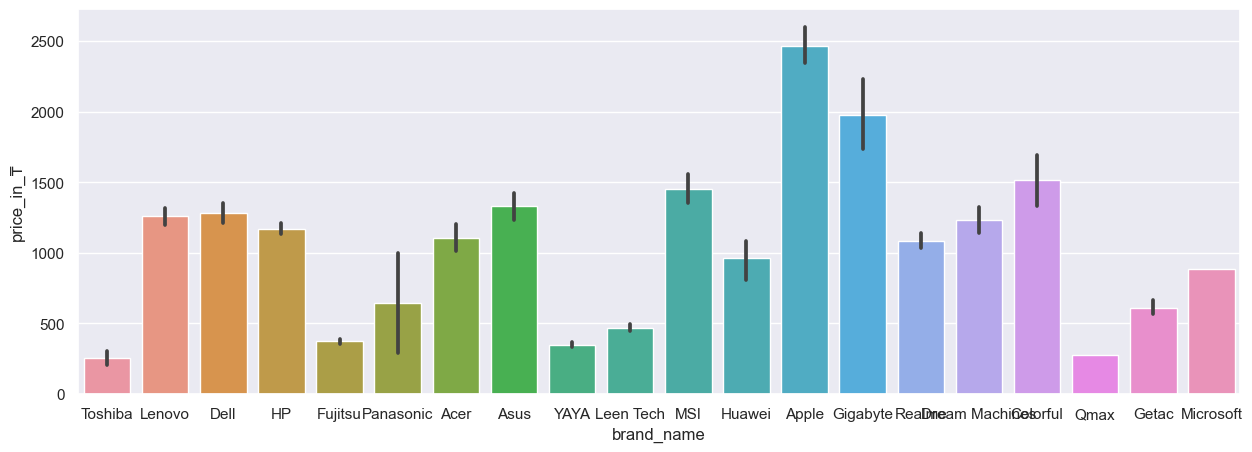

In [217]:
sns.barplot(x=df_final['brand_name'],y=df_final['price_in_₸'],data=df_final,estimator='mean')
# Internet shop mainly takes money from Apple and Gigabyte brands

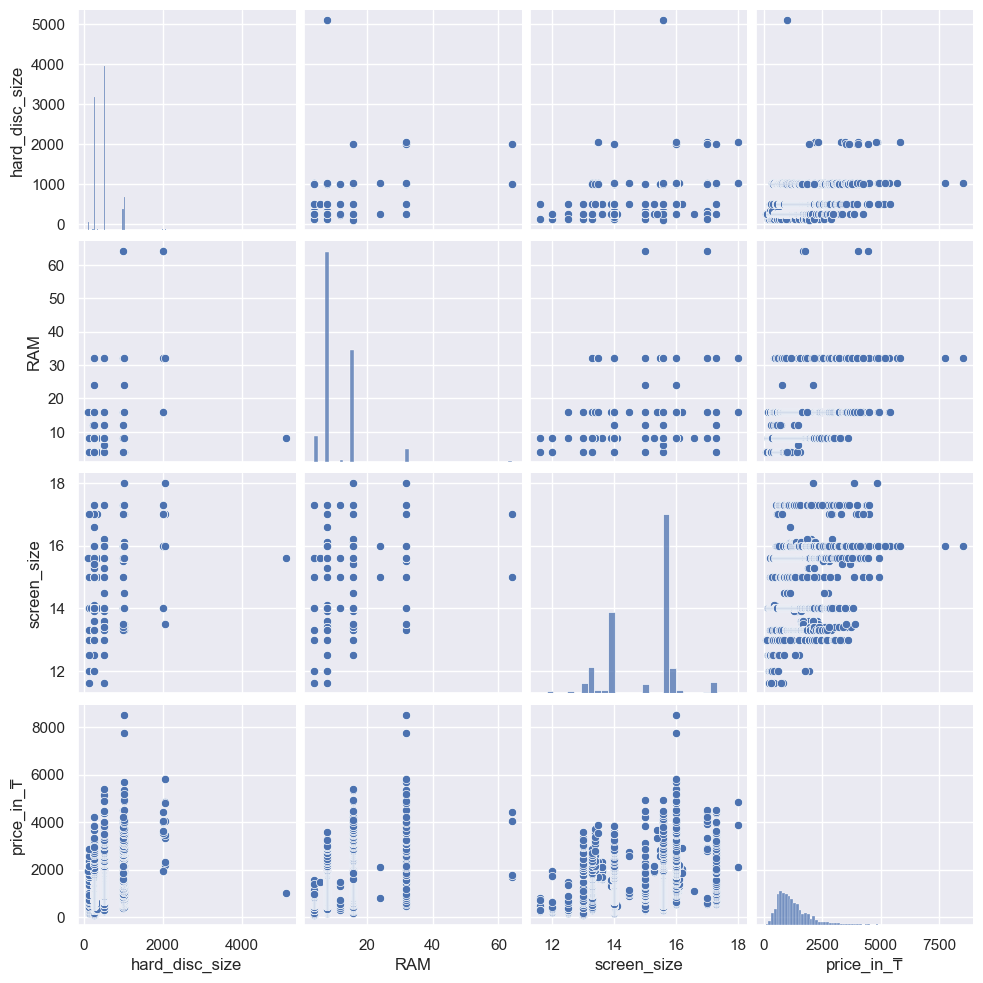

In [218]:
sns.pairplot(df_final)

<AxesSubplot: xlabel='price_in_₸', ylabel='Count'>

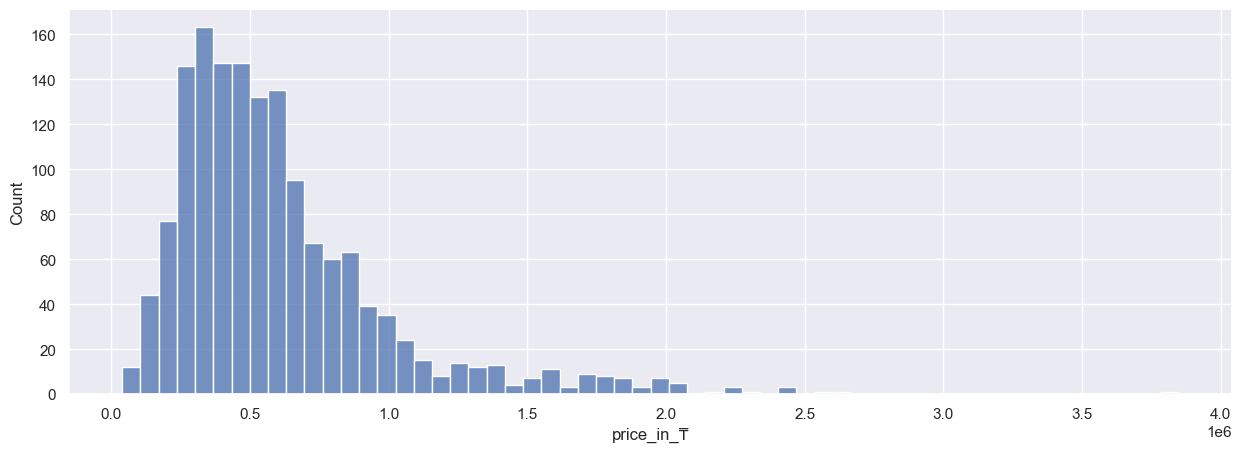

In [219]:
sns.histplot(x=df['price_in_₸'])

As we can see there are lot of outliers and the distribution is right-skewed

In [220]:
df_final.drop(['laptop_name'],axis=1,inplace=True)

In [221]:
df_final.head()

,brand_name,hard_disc_size,disc-tech,RAM,screen_size,price_in_₸
0,Toshiba,250,HDD,4,13.0,86.226005
1,Toshiba,250,HDD,4,13.0,103.958860
2,Toshiba,250,HDD,4,13.0,149.620960
3,Toshiba,250,HDD,4,13.0,174.890278
4,Lenovo,256,SSD,16,12.5,177.106885


In [222]:
df_final.shape

(2845, 6)

# Identifying ouliers in price and removing them

In [265]:
sns.set(rc={"figure.figsize":(6,3)}) 

<AxesSubplot: xlabel='price_in_₸'>

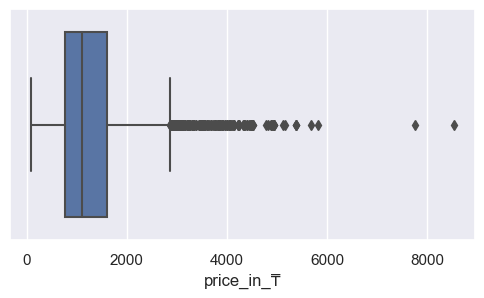

In [266]:
sns.boxplot(x=df_final['price_in_₸'])

There are a lot of outliers,we need to remove them

In [267]:
Q1 = df_final['price_in_₸'].quantile(0.25)
Q3 = df_final['price_in_₸'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df_final[(df_final['price_in_₸'] >= lower_bound) & (df_final['price_in_₸'] <= upper_bound)]

<AxesSubplot: xlabel='price_in_₸'>

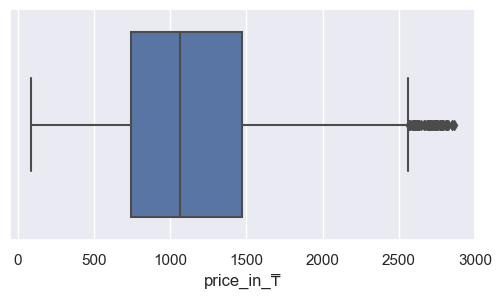

In [268]:
sns.boxplot(x=df_without_outliers['price_in_₸'])

In [269]:
Q1 = df_without_outliers['price_in_₸'].quantile(0.25)
Q3 = df_without_outliers['price_in_₸'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df_without_outliers[(df_without_outliers['price_in_₸'] >= lower_bound) & (df_without_outliers['price_in_₸'] <= upper_bound)]

In [270]:
Q1 = df_without_outliers['price_in_₸'].quantile(0.25)
Q3 = df_without_outliers['price_in_₸'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df_without_outliers[(df_without_outliers['price_in_₸'] >= lower_bound) & (df_without_outliers['price_in_₸'] <= upper_bound)]

<AxesSubplot: xlabel='price_in_₸'>

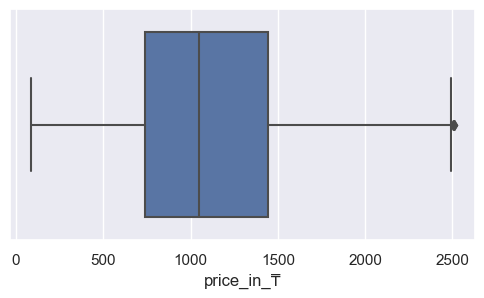

In [271]:
sns.boxplot(x=df_without_outliers['price_in_₸'])

In [272]:
Q1 = df_without_outliers['price_in_₸'].quantile(0.25)
Q3 = df_without_outliers['price_in_₸'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df_without_outliers[(df_without_outliers['price_in_₸'] >= lower_bound) & (df_without_outliers['price_in_₸'] <= upper_bound)]

<AxesSubplot: xlabel='price_in_₸', ylabel='Count'>

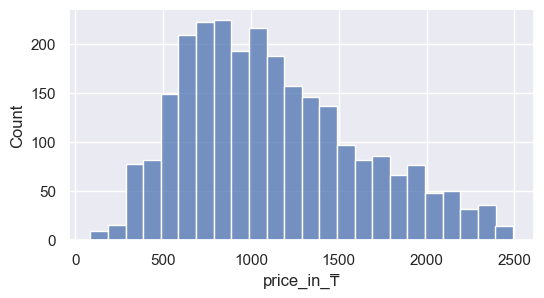

In [273]:
sns.histplot(x=df_without_outliers['price_in_₸'])

All outliers are removed

In [231]:
df_without_outliers.shape

(2608, 6)

Encoding of categorical data

In [232]:
import category_encoders as ce

In [233]:
encoder = ce.OneHotEncoder(cols=['brand_name','disc-tech'])

In [234]:
df_encoded = df_without_outliers.copy()

In [235]:
df_encoded = encoder.fit_transform(df_encoded)

In [236]:
df_encoded.head()

,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,brand_name_9,brand_name_10,...,brand_name_18,brand_name_19,brand_name_20,hard_disc_size,disc-tech_1,disc-tech_2,disc-tech_3,RAM,screen_size,price_in_₸
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,86.226005
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,103.958860
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,149.620960
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,174.890278
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,256,0,1,0,16,12.5,177.106885


In [237]:
df_encoded.shape

(2608, 27)

In [275]:
sns.set(rc={"figure.figsize":(15, 10)}) 

C:\Users\askha\AppData\Local\Temp\ipykernel_13284\4140759874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(),annot=True)


<AxesSubplot: >

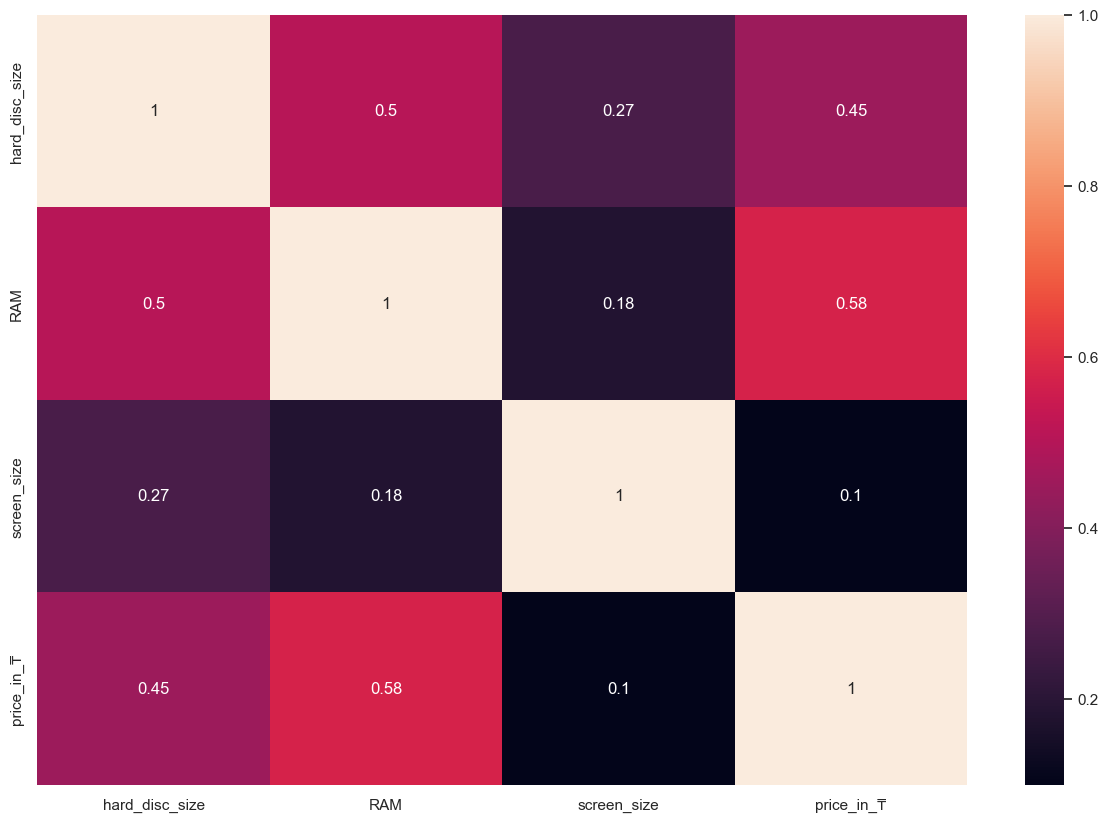

In [277]:
sns.heatmap(df_final.corr(),annot=True)

# Implementation of algorithm without hyperparameter tuning

In [240]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import optuna

In [241]:
x = df_without_outliers.drop(['price_in_₸'],axis=1)
y = df_without_outliers[['price_in_₸']]

In [242]:
# using the train test split function  
x_train,x_test,y_train, y_test = train_test_split(x,y , 
                                   random_state=104,  
                                   test_size=0.3) 

In [243]:
#features for auto encoding 
cat_features = ['brand_name','disc-tech']

Trying algorithm without fine tuning

In [244]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(cat_features=cat_features).fit(x_train,y_train)

Learning rate set to 0.045026
0:	learn: 500.2462947	total: 19.4ms	remaining: 19.3s
1:	learn: 491.1514960	total: 41.5ms	remaining: 20.7s
2:	learn: 482.7321115	total: 59ms	remaining: 19.6s
3:	learn: 474.5150292	total: 83.9ms	remaining: 20.9s
4:	learn: 466.3764951	total: 103ms	remaining: 20.5s
5:	learn: 458.5509235	total: 124ms	remaining: 20.5s
6:	learn: 451.6528825	total: 149ms	remaining: 21.2s
7:	learn: 445.7178586	total: 167ms	remaining: 20.7s
8:	learn: 439.4628879	total: 182ms	remaining: 20s
9:	learn: 434.1873535	total: 198ms	remaining: 19.6s
10:	learn: 429.1236577	total: 214ms	remaining: 19.3s
11:	learn: 423.5615160	total: 231ms	remaining: 19s
12:	learn: 419.2877261	total: 253ms	remaining: 19.2s
13:	learn: 414.8293970	total: 268ms	remaining: 18.9s
14:	learn: 410.8475075	total: 286ms	remaining: 18.8s
15:	learn: 407.2332827	total: 305ms	remaining: 18.8s
16:	learn: 403.1777390	total: 321ms	remaining: 18.6s
17:	learn: 399.4053285	total: 339ms	remaining: 18.5s
18:	learn: 395.9084629	total

49:	learn: 348.6092824	total: 1.07s	remaining: 20.3s
50:	learn: 348.2471741	total: 1.09s	remaining: 20.2s
51:	learn: 347.6506605	total: 1.1s	remaining: 20.1s
52:	learn: 347.2934043	total: 1.12s	remaining: 20s
53:	learn: 346.7713531	total: 1.14s	remaining: 20s
54:	learn: 346.3412712	total: 1.17s	remaining: 20.1s
55:	learn: 345.8533322	total: 1.2s	remaining: 20.2s
56:	learn: 345.1833065	total: 1.23s	remaining: 20.3s
57:	learn: 344.7078378	total: 1.25s	remaining: 20.3s
58:	learn: 344.3533547	total: 1.27s	remaining: 20.3s
59:	learn: 343.5538570	total: 1.3s	remaining: 20.4s
60:	learn: 343.0282704	total: 1.33s	remaining: 20.4s
61:	learn: 342.7711173	total: 1.36s	remaining: 20.5s
62:	learn: 342.5094594	total: 1.39s	remaining: 20.6s
63:	learn: 342.0982338	total: 1.42s	remaining: 20.8s
64:	learn: 341.7840996	total: 1.46s	remaining: 20.9s
65:	learn: 341.2883291	total: 1.49s	remaining: 21.1s
66:	learn: 340.9710549	total: 1.54s	remaining: 21.4s
67:	learn: 340.3429316	total: 1.57s	remaining: 21.5s


In [245]:
y_pred = model.predict(x_test)
mean_squared_error(y_test,y_pred,squared=False)

329.45313491820843

In [246]:
mean_absolute_error(y_test,y_pred)

252.41895469474917

Trying algorithm using Optuna

In [247]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations",100,1000,step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0,log=True),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0,log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True,cat_features=cat_features)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [248]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=75)

[I 2024-04-05 15:43:15,143] A new study created in memory with name: no-name-cc798340-590d-4a67-8671-31a34fa96ae0
[I 2024-04-05 15:43:16,623] Trial 0 finished with value: 347.46687192447376 and parameters: {'iterations': 500, 'learning_rate': 0.027530547706098578, 'depth': 5, 'subsample': 0.11448800368362767, 'colsample_bylevel': 0.1970608684689732, 'min_data_in_leaf': 22}. Best is trial 0 with value: 347.46687192447376.
[I 2024-04-05 15:43:18,935] Trial 1 finished with value: 349.620091817728 and parameters: {'iterations': 900, 'learning_rate': 0.031880619976799744, 'depth': 5, 'subsample': 0.7744824688617534, 'colsample_bylevel': 0.10346922917196658, 'min_data_in_leaf': 78}. Best is trial 0 with value: 347.46687192447376.
[I 2024-04-05 15:43:20,653] Trial 2 finished with value: 368.77273588485707 and parameters: {'iterations': 600, 'learning_rate': 0.008334838616374006, 'depth': 3, 'subsample': 0.07610791267458236, 'colsample_bylevel': 0.18756953744941313, 'min_data_in_leaf': 3}. Bes

In [254]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'iterations': 900, 'learning_rate': 0.03683687310049815, 'depth': 7, 'subsample': 0.8070955661970811, 'colsample_bylevel': 0.382424852045158, 'min_data_in_leaf': 16}
Best RMSE: 327.52904506220176


In [255]:
model = CatBoostRegressor(iterations=900,learning_rate= 0.03683687310049815,depth=7,subsample= 0.8070955661970811,colsample_bylevel=0.382424852045158,min_data_in_leaf=16).fit(x_train,y_train,cat_features=cat_features)

0:	learn: 501.5392877	total: 16.5ms	remaining: 14.8s
1:	learn: 493.5281745	total: 36.2ms	remaining: 16.3s
2:	learn: 486.4833691	total: 49.4ms	remaining: 14.8s
3:	learn: 479.6577332	total: 64.1ms	remaining: 14.4s
4:	learn: 473.8516851	total: 78.6ms	remaining: 14.1s
5:	learn: 468.9216556	total: 79.6ms	remaining: 11.9s
6:	learn: 462.1420034	total: 106ms	remaining: 13.6s
7:	learn: 457.0217265	total: 121ms	remaining: 13.5s
8:	learn: 451.4867174	total: 132ms	remaining: 13.1s
9:	learn: 445.6068469	total: 142ms	remaining: 12.7s
10:	learn: 441.1989253	total: 152ms	remaining: 12.3s
11:	learn: 436.0904431	total: 160ms	remaining: 11.8s
12:	learn: 431.4949477	total: 183ms	remaining: 12.5s
13:	learn: 429.6387351	total: 185ms	remaining: 11.7s
14:	learn: 425.0704886	total: 194ms	remaining: 11.4s
15:	learn: 420.8154051	total: 210ms	remaining: 11.6s
16:	learn: 417.3824377	total: 218ms	remaining: 11.3s
17:	learn: 413.9917500	total: 232ms	remaining: 11.4s
18:	learn: 411.6112079	total: 256ms	remaining: 11.

In [256]:
y_pred = model.predict(x_test)

In [257]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

327.52904506220176

In [259]:
mean_absolute_error(y_test,y_pred)

251.32158607544093

Results are pretty good,considering the fact that we are predicting laptop prices,where scale of prices is relatively large!

MAE and MSE go down with fine tuning,but not so considerably.